# Project: Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#appendix">Appendix</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Soccer Dataset from Kaggle is a collection of tables detailing the ratings of teams (clubs and international) along with the FIFA registered players. Following are the tables part of the Database:

1. Country
2. League
3. Match
4. Player_attributes
5. Team
6. Team_attributes

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sqlite3

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

Since the data is in sqlite we would be using the **sqlite3** library

In [2]:
conn = sqlite3.connect('database.sqlite')

Sqlite3 requires basic knowledge of SQL. However, it can run advanced queries too. Since the scope of this project is limited to Python, I would not be deep diving into SQL.

Here we load all the tables present with the sqlite database:

In [3]:
country_df = pd.read_sql_query('select * from country',conn)
match_df = pd.read_sql_query('select * from match',conn)
player_df = pd.read_sql_query('select * from player',conn)
player_attr_df = pd.read_sql_query('select * from player_attributes',conn)

We would now check for missing values from the following three tables:
    1. player_df
    2. player_attr_df
    3. match_df
    4. country_df
For limiting the scope of this project I would not be using the other tables.

In [4]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


We see that there are no missing value within the player_df. We can also see that the object types here make sense depending on the information they hold.

---

In [5]:
player_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

Unlike player_df, player_attr_df has a number of missing values. We would deep dive into this in the next section. 

---

In [6]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


The `country_df` can be used as a lookup table for `match_df` to seggregate matches based on the country they are played in.

Let us explore the `match_df` table. Since there are about 96 columns, we would be converting them to a list so we can see the name of the columns within the table.

In [7]:
match_l = list(match_df.columns)
print(match_l)

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

Since the `match_df` has a number of columns listed above, we would only be selecting a handful of them as all of them are not relevant for our scope of the project.

In [8]:
match_df = match_df[['id', 'country_id', 'season', 'stage', 'match_api_id', 'home_team_goal', 'away_team_goal']]

In [9]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25979 non-null  int64 
 1   country_id      25979 non-null  int64 
 2   season          25979 non-null  object
 3   stage           25979 non-null  int64 
 4   match_api_id    25979 non-null  int64 
 5   home_team_goal  25979 non-null  int64 
 6   away_team_goal  25979 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ MB


### Investigating Null Values within Player Attributes

As we had seen in the previous section, players_attr_df is the only table of the three which has missing values.

In [10]:
player_attr_df[player_attr_df['overall_rating'].isna()==True]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
483,484,33022,31684,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,984,111085,29904,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,1753,165740,24159,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,2090,176941,31916,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2483,177615,37249,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,182588,116368,25538,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183249,183250,139865,32633,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183309,183310,141272,33823,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183361,183362,168650,25772,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When filtering for all the null values in *overall_rating* we see that the other columns like *potential, preferred_foot, attacking_work_rate* etc. are null as well. Let's see what happens when we remove these null rows.

In [11]:
player_attr_df.dropna(subset=['overall_rating']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183142 non-null  int64  
 1   player_fifa_api_id   183142 non-null  int64  
 2   player_api_id        183142 non-null  int64  
 3   date                 183142 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

We see there are additional null values in columns like *attacking_work_rate*

In [12]:
player_attr_df[player_attr_df['attacking_work_rate'].isna()==True]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,None,_0,41.0,...,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,None,_0,41.0,...,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,None,_0,41.0,...,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,None,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183963,183964,47058,35506,2009-08-30 00:00:00,70.0,78.0,right,None,_0,48.0,...,63.0,70.0,70.0,74.0,65.0,14.0,25.0,51.0,25.0,25.0
183964,183965,47058,35506,2009-02-22 00:00:00,70.0,78.0,right,None,_0,48.0,...,63.0,70.0,70.0,74.0,65.0,14.0,25.0,51.0,25.0,25.0
183965,183966,47058,35506,2008-08-30 00:00:00,72.0,78.0,right,None,_0,48.0,...,63.0,70.0,76.0,78.0,65.0,14.0,25.0,51.0,25.0,25.0
183966,183967,47058,35506,2007-08-30 00:00:00,75.0,78.0,right,None,_0,48.0,...,63.0,70.0,76.0,78.0,65.0,14.0,25.0,51.0,25.0,25.0


Along with the missing values in column *attacking_work_rate* we see that columns like *defensive_work_rate* has values like *_0*. This makes me curious to see what unique values these object columns hold

In [13]:
player_attr_df['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [14]:
player_attr_df['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', None, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

We now see that in addition to just the standard values for these columns (*low, medium and high*), there are some garbage values as well. We would need to clean these as well.

In [15]:
player_attr_df = player_attr_df[((player_attr_df['attacking_work_rate']=='high') |
                (player_attr_df['attacking_work_rate']=='medium') |
                (player_attr_df['attacking_work_rate']=='low')) &
               ((player_attr_df['defensive_work_rate']=='high') |
                (player_attr_df['defensive_work_rate']=='medium') |
                (player_attr_df['defensive_work_rate']=='low'))
              ]



In [16]:
player_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   176161 non-null  int64  
 1   player_fifa_api_id   176161 non-null  int64  
 2   player_api_id        176161 non-null  int64  
 3   date                 176161 non-null  object 
 4   overall_rating       176161 non-null  float64
 5   potential            176161 non-null  float64
 6   preferred_foot       176161 non-null  object 
 7   attacking_work_rate  176161 non-null  object 
 8   defensive_work_rate  176161 non-null  object 
 9   crossing             176161 non-null  float64
 10  finishing            176161 non-null  float64
 11  heading_accuracy     176161 non-null  float64
 12  short_passing        176161 non-null  float64
 13  volleys              176161 non-null  float64
 14  dribbling            176161 non-null  float64
 15  curve            

We can see now that we have no missing values. We would make sure if there are no garbage values for other columns. Since, `preferred_foot` is the only other column with object values, we would check what values it holds.

In [17]:
player_attr_df['preferred_foot'].unique()

array(['right', 'left'], dtype=object)

`preferred_foot` does not require any cleaning up since the values `right` and `left` make sense as a player can only be either of one.

In [18]:
player_attr_df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,...,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000
mean,91840.417033,167305.852311,138278.214866,68.690857,73.519337,55.212573,50.048217,57.262805,62.542146,49.577687,...,57.887660,54.941082,46.727908,50.343180,48.025204,14.721266,15.892661,20.249420,15.962211,16.276679
std,53130.276666,52383.037960,137882.077955,7.023502,6.578955,17.260152,19.032411,16.497744,14.183990,18.265310,...,15.160678,15.555754,21.241315,21.520424,21.621540,16.865240,15.863331,20.955093,16.092080,17.217545
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45788.000000,157304.000000,35495.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91812.000000,183900.000000,89827.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,11.000000,11.000000,11.000000
75%,137810.000000,200256.000000,193174.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


As we can see, the columns with values do not show any discrepancy as such.

---

Let us know look at the values for **player_df** table and make sure there are no discrepancies

In [19]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [20]:
player_df.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


As per the above analysis, we see that there is no missing data or outliers in the columns of *player_df*.

---

<a id='eda'></a>
## Exploratory Data Analysis


### How are players who are left footed different from those that are right_footed?

We would start the EDA by combining the tables `player_df` and `player_attr_df` since the former provides name, weight and height for the player whereas the latter provides the technical specifications of the player over a number of seasons.

In [21]:
player_met_df = player_df.merge(player_attr_df, left_on=player_df['player_api_id'], right_on=player_attr_df['player_api_id'])

In [22]:
player_met_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 176160
Data columns (total 50 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   key_0                 176161 non-null  int64  
 1   id_x                  176161 non-null  int64  
 2   player_api_id_x       176161 non-null  int64  
 3   player_name           176161 non-null  object 
 4   player_fifa_api_id_x  176161 non-null  int64  
 5   birthday              176161 non-null  object 
 6   height                176161 non-null  float64
 7   weight                176161 non-null  int64  
 8   id_y                  176161 non-null  int64  
 9   player_fifa_api_id_y  176161 non-null  int64  
 10  player_api_id_y       176161 non-null  int64  
 11  date                  176161 non-null  object 
 12  overall_rating        176161 non-null  float64
 13  potential             176161 non-null  float64
 14  preferred_foot        176161 non-null  object 
 15  

In [23]:
player_met_df.head()

,key_0,id_x,player_api_id_x,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


We see there are a number of rows with similar named players, this is because each row represents the players statistics over multiple seasons. We would now be combining the stats of each of these players so that each row is distinct in terms of the name of the player. We would not be using all the variables within this table. In the following cell, `player_attr_col` is a list which lists out the variables we would be using for the EDA.

In [24]:
player_attr_col = ['height', 'weight', 'overall_rating','potential','sprint_speed', 'stamina']

In [25]:
player_df2 = player_met_df.groupby(['player_name','preferred_foot'], as_index=False)[player_attr_col].mean()

Let us see how is the player distribution in terms of the `foot_preference`.

[Text(0, 0.5, 'No. of Players'), Text(0.5, 0, 'Foot preference')]

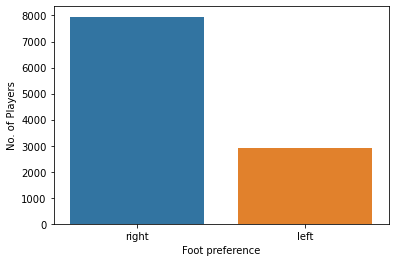

In [26]:
ax = sns.barplot(['right','left'], pd.DataFrame(player_df2['preferred_foot'].value_counts())['preferred_foot'])
ax.set(xlabel = 'Foot preference',ylabel = 'No. of Players')

Interesting, we see that there are more right footed players than left footed players. That is almost 3x difference.

I would be interested in knowing how these players differ in terms of their technical skills

In [27]:
foot_df = player_df2.groupby('preferred_foot', as_index=False).mean()

[Text(0, 0.5, 'Sprint Speed'), Text(0.5, 0, 'Foot Preference')]

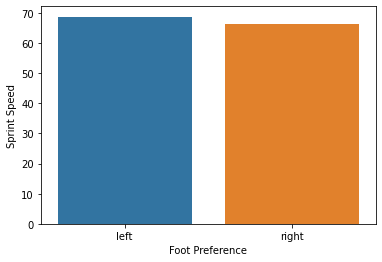

In [28]:
ax = sns.barplot('preferred_foot','sprint_speed',data = foot_df)
ax.set(xlabel = 'Foot Preference', ylabel='Sprint Speed')

[Text(0, 0.5, 'Stamina'), Text(0.5, 0, 'Foot Preference')]

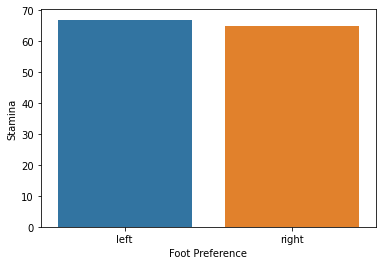

In [29]:
ax = sns.barplot('preferred_foot','stamina',data = foot_df)
ax.set(xlabel = 'Foot Preference' , ylabel = 'Stamina')

As per the data, we can see the `sprint_speed` and `stamina` of the left-footed players is higher than that of the right-footed players.

### Research Question 2  (Replace this header name!)

In [30]:
country_df

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [31]:
match_df = match_df.merge(country_df, left_on = 'country_id', right_on='id')

In [32]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_x            25979 non-null  int64 
 1   country_id      25979 non-null  int64 
 2   season          25979 non-null  object
 3   stage           25979 non-null  int64 
 4   match_api_id    25979 non-null  int64 
 5   home_team_goal  25979 non-null  int64 
 6   away_team_goal  25979 non-null  int64 
 7   id_y            25979 non-null  int64 
 8   name            25979 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.0+ MB


In [33]:
match_df = match_df[['season', 'stage', 'home_team_goal', 'away_team_goal', 'name']]

In [34]:
col_ren = {'name': 'country'}

In [35]:
match_df.rename(col_ren, axis=1, inplace=True)

In [36]:
match_df['total_goals'] = match_df['home_team_goal'] + match_df['away_team_goal']

In [72]:
season_df = match_df.groupby(['country','season'], as_index=False).mean()

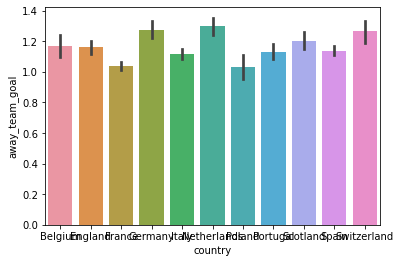

In [74]:
sns.barplot('country', 'away_team_goal', data = season_df)

[Text(0, 0, 'Belgium'),
 Text(0, 0, 'England'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Switzerland')]

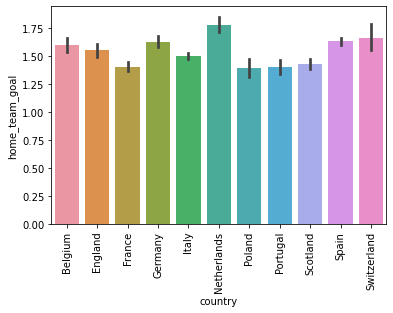

In [75]:
ax = sns.barplot('country','home_team_goal',data=season_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

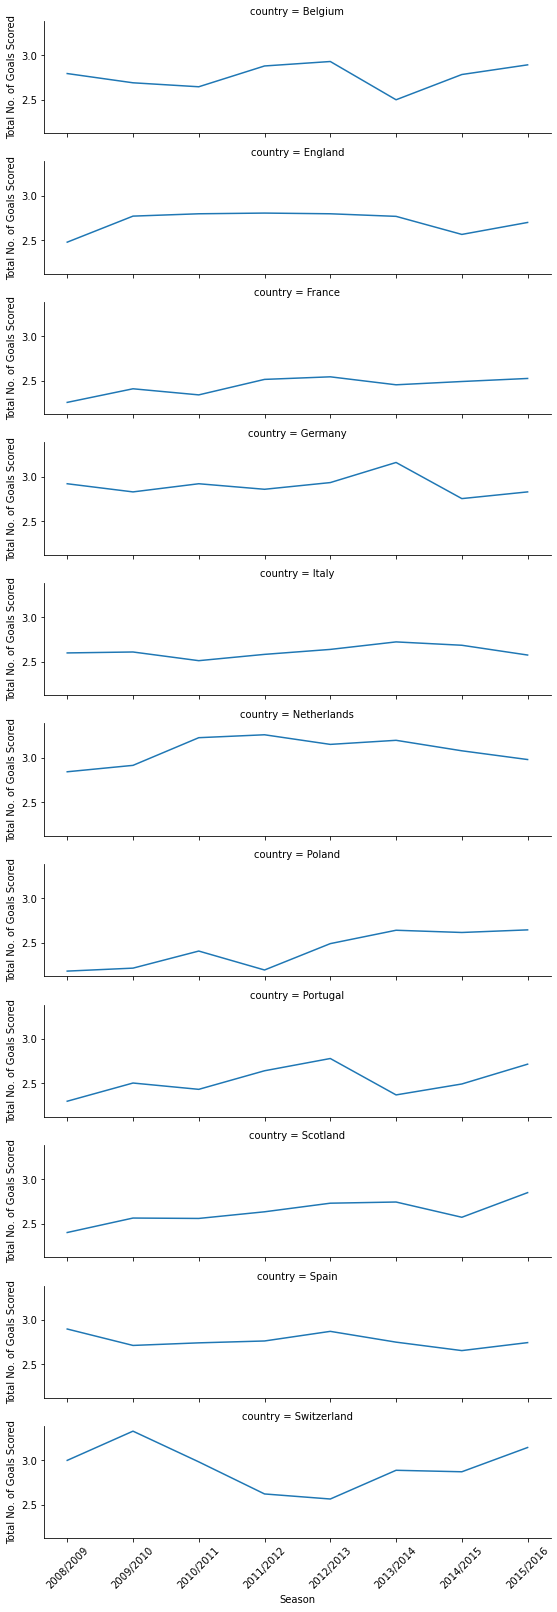

In [106]:
g = sns.FacetGrid(season_df, row='country', height=2, aspect =4)
g.map(sns.lineplot, "season","total_goals")
g.set_axis_labels("Season","Total No. of Goals Scored")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

In [63]:
match_df['season'] = match_df['season'].apply(lambda x: str(x))

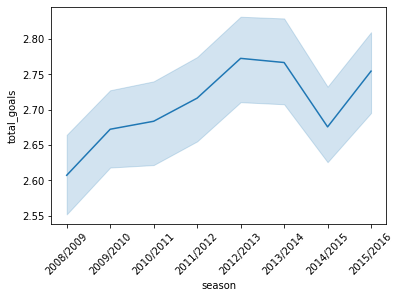

In [103]:
ax = sns.lineplot('season','total_goals',data=match_df)
for label in ax.get_xticklabels():
    label.set_rotation(45)

[Text(0, 0, 'Belgium'),
 Text(0, 0, 'England'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Switzerland')]

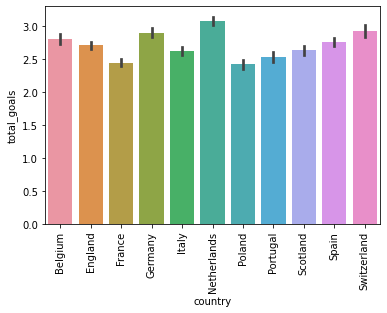

In [336]:
ax = sns.barplot('country','total_goals',data=match_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


<a id='appendix'></a>
## Appendix

In [209]:
player_df2.corr()

,height,weight,overall_rating,potential,sprint_speed,stamina
height,1.000000,0.763400,0.002322,-0.043174,-0.472357,-0.250142
weight,0.763400,1.000000,0.096996,-0.003656,-0.423242,-0.211038
overall_rating,0.002322,0.096996,1.000000,0.789246,0.231558,0.326326
potential,-0.043174,-0.003656,0.789246,1.000000,0.326006,0.237159
sprint_speed,-0.472357,-0.423242,0.231558,0.326006,1.000000,0.551210
stamina,-0.250142,-0.211038,0.326326,0.237159,0.551210,1.000000


As we see that height and weight are correlated, we can create another feature called body mass index which would be as simple as $$BMI = height/weight$$

In [210]:
player_df2['BMI'] = player_df2['height']/player_df2['weight']
player_df2.drop(['height','weight'], axis=1, inplace=True)

In [211]:
player_df2.corr()

,overall_rating,potential,sprint_speed,stamina,BMI
overall_rating,1.000000,0.789246,0.231558,0.326326,-0.127115
potential,0.789246,1.000000,0.326006,0.237159,-0.013146
sprint_speed,0.231558,0.326006,1.000000,0.551210,0.310992
stamina,0.326326,0.237159,0.551210,1.000000,0.136223
BMI,-0.127115,-0.013146,0.310992,0.136223,1.000000


In [200]:
mean = player_df2['BMI'].mean()
high_bmi = player_df2.query('BMI>{}'.format(mean))
low_bmi = player_df2.query('BMI<={}'.format(mean))

potential_high_bmi = high_bmi['potential'].mean()
potential_low_bmi = low_bmi['potential'].mean()


rating_high_bmi = high_bmi['overall_rating'].mean()
rating_low_bmi = low_bmi['overall_rating'].mean()



[Text(0, 0.5, 'Potential Ratings')]

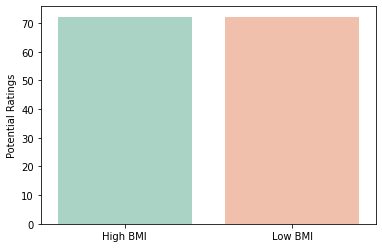

In [201]:
ax = sns.barplot(['High BMI', 'Low BMI'], [potential_high_bmi, potential_low_bmi], alpha = 0.6, palette="Set2")
ax.set(ylabel='Potential Ratings')

[Text(0, 0.5, 'Overall Ratings')]

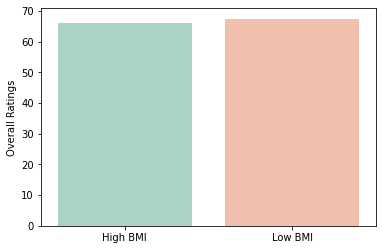

In [202]:
ax = sns.barplot(['High BMI', 'Low BMI'], [rating_high_bmi, rating_low_bmi], alpha=0.6, palette='Set2')
ax.set(ylabel="Overall Ratings")

In [203]:
player_df2.head()

,player_name,preferred_foot,overall_rating,potential,sprint_speed,BMI
0,Aaron Appindangoye,right,63.600000,67.600000,64.000000,0.977968
1,Aaron Cresswell,left,67.870968,75.419355,75.967742,1.165616
2,Aaron Cresswell,right,53.000000,60.000000,59.000000,1.165616
3,Aaron Doran,right,67.000000,74.192308,77.500000,1.044049
4,Aaron Galindo,right,69.086957,70.782609,52.826087,0.923636


In [191]:
right_leg = player_df2[player_df2['preferred_foot']=='right']
left_leg = player_df2[player_df2['preferred_foot']=='left']


right_potential = right_leg['potential'].mean()
left_potential = left_leg['potential'].mean()

right_rating = right_leg['overall_rating'].mean()
left_rating = left_leg['overall_rating'].mean()


[Text(0, 0.5, 'Potential Ratings')]

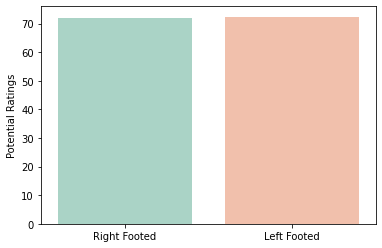

In [197]:
axs = sns.barplot(['Right Footed', 'Left Footed'], [right_potential, left_potential], alpha=0.6, palette='Set2')
axs.set(ylabel="Potential Ratings")

[Text(0, 0.5, 'Overall Ratings')]

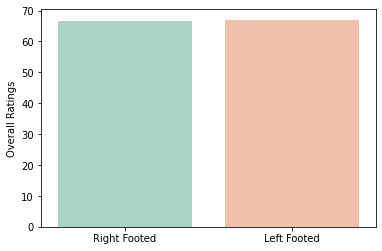

In [196]:
axs = sns.barplot(['Right Footed', 'Left Footed'], [right_rating, left_rating], alpha=0.6, palette='Set2')
axs.set(ylabel="Overall Ratings")


In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
